In [20]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed, flood
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import glob
from PIL import Image

In [18]:
def compare(img_path):
    img = Image.open(img_path)
    img = np.array(img)
    
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
    segments_slic = slic(img, n_segments=250, compactness=10, sigma=1, start_label=1)
    segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
    gradient = sobel(rgb2gray(img))
    segments_watershed = watershed(gradient, markers=250, compactness=0.001)
    
    print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
    print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
    print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
    print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
    
    ax[0, 0].imshow(mark_boundaries(img, segments_fz))
    ax[0, 0].set_title("Felzenszwalbs's method")
    ax[0, 1].imshow(mark_boundaries(img, segments_slic))
    ax[0, 1].set_title('SLIC')
    ax[1, 0].imshow(mark_boundaries(img, segments_quick))
    ax[1, 0].set_title('Quickshift')
    ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
    ax[1, 1].set_title('Compact watershed')
    
    for a in ax.ravel():
        a.set_axis_off()
    
    plt.tight_layout()
    plt.show()

In [6]:
image_dir = r'D:\new_PycharmProject\TransZero-train\data\CUB\CUB_200_2011\images\001.Black_footed_Albatross\*.jpg'
images = glob.glob(image_dir)

Felzenszwalb number of segments: 120
SLIC number of segments: 230
Quickshift number of segments: 200
Watershed number of segments: 247


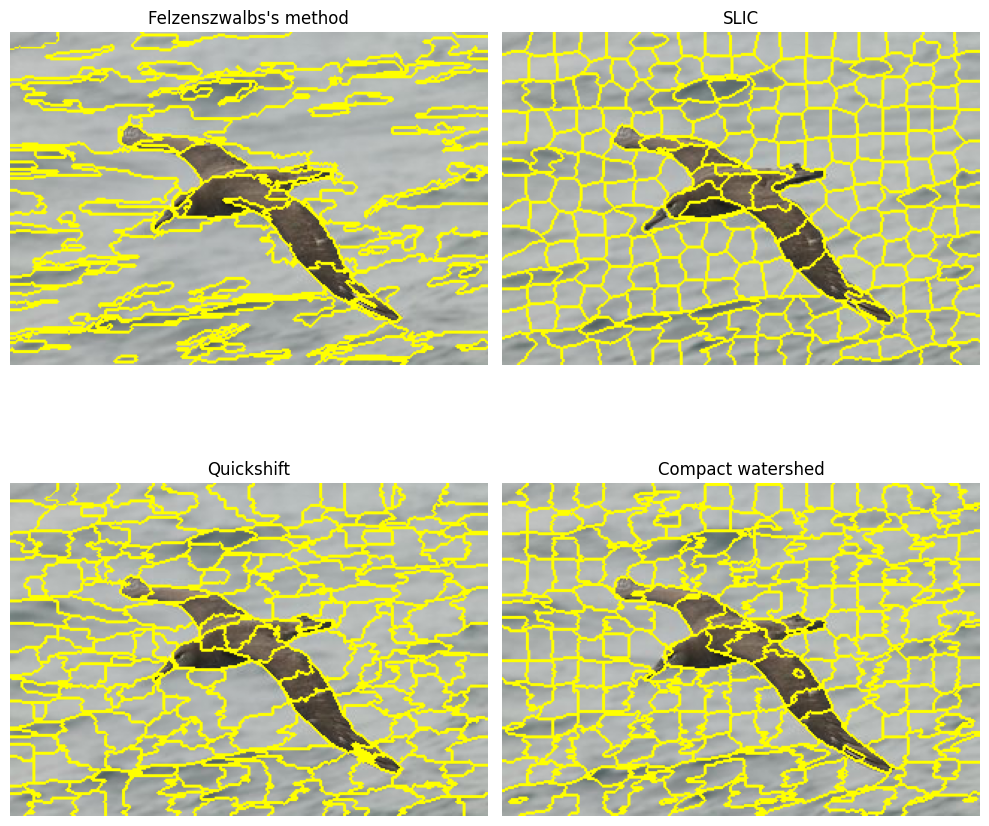

In [19]:
compare(images[0])

Felzenszwalb number of segments: 420
SLIC number of segments: 208
Quickshift number of segments: 1037
Watershed number of segments: 247


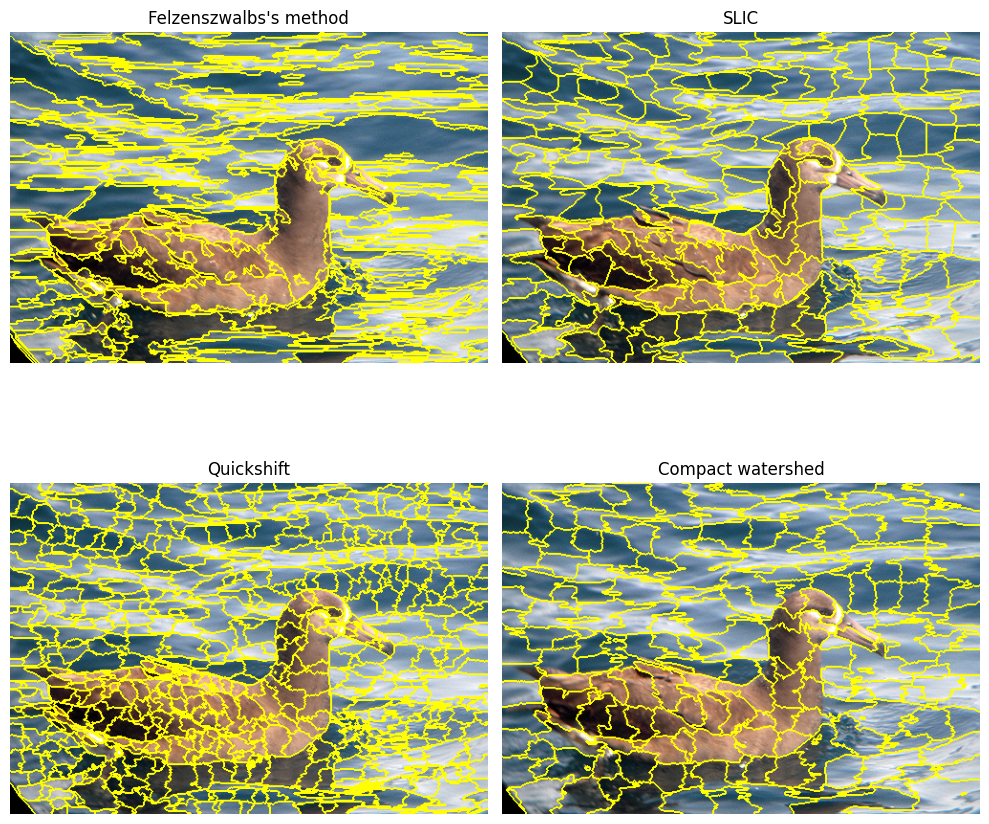

In [22]:
img = Image.open(images[1])
img = np.array(img)

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1, start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [27]:
segments_fz

array([[  0,   0,   0, ...,   7,   7,   7],
       [  0,   0,   0, ...,   7,   7,   7],
       [  0,   0,   0, ...,   7,   7,   7],
       ...,
       [378, 378, 378, ..., 416, 416, 416],
       [378, 378, 378, ..., 416, 416, 416],
       [378, 378, 378, ..., 416, 416, 416]], dtype=int64)

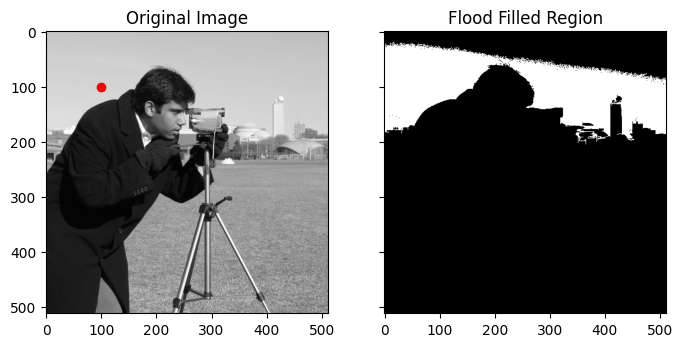

In [21]:
# 加载示例图像
image = data.camera()

# 定义种子点
seed_point = (100, 100)

# 执行泛洪填充
mask = flood(image, seed_point, tolerance=10)

# 可视化结果
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro')  # 标记种子点
ax[0].set_title('Original Image')

ax[1].imshow(mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Filled Region')

plt.show()
